<a href="https://colab.research.google.com/github/MaliheDahmardeh/Olympic-History/blob/main/Olympic_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data info

**Context:**

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. data has scraped from www.sports-reference.com in May 2018. 

The Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on.

**Content:**

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

ID : Unique number for each athlete

Name : Athlete's name

Sex : M or F

Age : Integer

Height : In centimeters

Weight : In kilograms

Team : Team name

NOC : National Olympic Committee 3-letter code

Games : Year and season

Year : Integer

Season : Summer or Winter

City : Host city

Sport : Sport

Event : Event

Medal : Gold, Silver, Bronze, or NA

#Dataset loading

In [47]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [48]:
!ls

athlete_events.csv  noc_regions.csv  sample_data


In [49]:
df_events = pd.read_csv('athlete_events.csv')

In [50]:
df_noc = pd.read_csv('noc_regions.csv')

In [51]:
df = pd.merge(df_events,df_noc,on='NOC',how='left')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


#Data Cleaning

In [53]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [54]:
#drop columns 'notes' and 'ID' because they are not important and column 'notes' has lots of null values
df.drop(columns=['notes','ID'],inplace=True)

In [55]:
# check and drop duplicated rows
df.duplicated().sum()

1385

In [56]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
dtype: int64

Fill  null value for Age, Height and Weight with mean of them

In [58]:
#Mean of height
mean_height=df["Height"].mean()
rmh=round(mean_height)
rmh

175

In [59]:
df["Height"]=df["Height"].fillna(rmh)
df["Height"]

0         180.0
1         170.0
2         175.0
3         175.0
4         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 269731, dtype: float64

In [60]:
#Mean of weight
mean_weight=df["Weight"].mean()
rmw=round(mean_weight)
rmw

71

In [61]:
df["Weight"]=df["Weight"].fillna(rmw)
df["Weight"]

0         80.0
1         60.0
2         71.0
3         71.0
4         82.0
          ... 
271111    89.0
271112    59.0
271113    59.0
271114    96.0
271115    96.0
Name: Weight, Length: 269731, dtype: float64

In [62]:
#Mean of Age
mean_age=df["Age"].mean()
rma=round(mean_age)
rma

25

In [63]:
df["Age"]=df["Age"].fillna(rma)
df["Age"]

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 269731, dtype: float64

In [64]:
#Changing float type data to integer
df["Age"]=df["Age"].astype(int)
df["Height"]=df["Height"].astype(int)
df["Weight"]=df["Weight"].astype(int)

In [65]:
df.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [66]:
#drop Medal null values
drop_rows = df.dropna( how='any',subset=['Medal'], inplace=True)

In [67]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    9
dtype: int64

In [68]:
#fill remaining null values in region with 'unknown'
df["region"]=df["region"].fillna('unknown')
df["region"]

3         Denmark
37        Finland
38        Finland
40        Finland
41        Finland
           ...   
271078     Russia
271080     Russia
271082     Poland
271102     Russia
271103     Russia
Name: region, Length: 39772, dtype: object

In [69]:
#view of "unknown" region
region_unknown=df.loc[(df["region"]=="unknown")]
region_unknown

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
67723,Feng Tian Wei,F,21,163,55,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,unknown
67724,Feng Tian Wei,F,25,163,55,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Singles,Bronze,unknown
67725,Feng Tian Wei,F,25,163,55,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,unknown
138095,Li Jia Wei,F,26,170,60,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,unknown
138096,Li Jia Wei,F,30,170,60,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,unknown
213955,Joseph Isaac Schooling,M,21,184,74,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Gold,unknown
235908,"Howe Liang ""Tiger"" Tan",M,27,160,69,Singapore,SGP,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Lightweight,Silver,unknown
256622,Wang Jue Gu,F,28,155,63,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,unknown
256624,Wang Jue Gu,F,32,155,63,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,unknown


In [70]:
#because in the Noc_region data frame NOC for Singapore is SIN and in the athlete_events data frame it is SGP we missed some data so we replace "unknown" with "singapore"
df["region"]=df["region"].replace('unknown','Singapore')
region_singapore=df.loc[(df["region"]=="Singapore")]
region_singapore

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
67723,Feng Tian Wei,F,21,163,55,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,Singapore
67724,Feng Tian Wei,F,25,163,55,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Singles,Bronze,Singapore
67725,Feng Tian Wei,F,25,163,55,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,Singapore
138095,Li Jia Wei,F,26,170,60,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,Singapore
138096,Li Jia Wei,F,30,170,60,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,Singapore
213955,Joseph Isaac Schooling,M,21,184,74,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Gold,Singapore
235908,"Howe Liang ""Tiger"" Tan",M,27,160,69,Singapore,SGP,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Lightweight,Silver,Singapore
256622,Wang Jue Gu,F,28,155,63,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,Silver,Singapore
256624,Wang Jue Gu,F,32,155,63,Singapore,SGP,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,Bronze,Singapore


In [71]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

#Data Exploration

In [72]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,39772,28202,"Michael Fred Phelps, II",28
Sex,39772,2,M,28519
Team,39772,498,United States,5219
NOC,39772,149,USA,5637
Games,39772,51,2008 Summer,2048
Season,39772,2,Summer,34077
City,39772,42,London,3624
Sport,39772,66,Athletics,3969
Event,39772,756,Football Men's Football,1269
Medal,39772,3,Gold,13369


In [73]:
df.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Age,39772.0,25.906215,5.857790,10.0,22.0,25.0,29.0,73.0
Height,39772.0,176.995474,9.686490,136.0,172.0,175.0,183.0,223.0
Weight,39772.0,73.119054,13.191658,28.0,66.0,71.0,79.0,182.0
Year,39772.0,1973.964296,33.805168,1896.0,1952.0,1984.0,2002.0,2016.0


In [74]:
#overall statistic of the olampics during the 1896-2016

print('Total number of times olympic being held :',df['Year'].nunique())
print('Total number of cities which have participated :',df['City'].nunique())
print('Total number of different sports played :',df['Sport'].nunique())
print('Total number of events held in olympics held :',df['Event'].nunique())
print('Total number of athletes who have participated :',df['Name'].nunique())
print('Total number of regions who have participated :',df['region'].nunique())

Total number of times olympic being held : 35
Total number of cities which have participated : 42
Total number of different sports played : 66
Total number of events held in olympics held : 756
Total number of athletes who have participated : 28202
Total number of regions who have participated : 137


In [75]:
#total number of Gold,Silver,Bronze Medals during the 1896-2016
medals=df['Medal'].value_counts()
print('number of different medals:')
print(medals)

number of different medals:
Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64


In [76]:
#Medals is a categorical column we can get separate columns of Gold, Silver and Bronze from column Medal by using the get_dummies method of pandas.
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
3,Edgar Lindenau Aabye,M,34,175,71,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
37,Arvo Ossian Aaltonen,M,30,175,71,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,1,0,0
38,Arvo Ossian Aaltonen,M,30,175,71,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,1,0,0
40,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,1,0,0
41,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25,168,80,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,0,0,1
271080,Galina Ivanovna Zybina (-Fyodorova),F,33,168,80,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,1,0,0
271082,Bogusaw Zych,M,28,182,82,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland,1,0,0
271102,Olesya Nikolayevna Zykina,F,19,171,64,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,1,0,0


In [77]:
#since some sports are team sport like water polo,Basketball,...the number of medals are more than one in our dataframe for example 12 for basketball (https://en.wikipedia.org/wiki/Team_sport#Olympic_team_sports)(https://en.wikipedia.org/wiki/List_of_Olympic_medalists_in_basketball)for counting medal for different country remove duplicates medals for team sport
df_medal_duplicated = df.drop_duplicates(subset=['Event','Sport','Team','region','Games','Year','City','Medal']).reset_index()
df_medal_duplicated.drop(columns=['index'], inplace=True)
df_medal_duplicated

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,Edgar Lindenau Aabye,M,34,175,71,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
1,Arvo Ossian Aaltonen,M,30,175,71,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,1,0,0
2,Arvo Ossian Aaltonen,M,30,175,71,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,1,0,0
3,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,1,0,0
4,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,Anton Zwerina,M,23,175,66,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,0,0,1
18923,Claudia Antoinette Zwiers,F,22,181,78,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,1,0,0
18924,Galina Ivanovna Zybina (-Fyodorova),F,21,168,80,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,0,1,0
18925,Galina Ivanovna Zybina (-Fyodorova),F,25,168,80,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,0,0,1


In [78]:
#number of different medals from 1896 to 2016 for each region,by using (df_medal_duplicated) for counting medal for different country consider one medal for each team sport,
number_of_different_medals=df_medal_duplicated.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
number_of_different_medals['Total']=number_of_different_medals['Gold'] + number_of_different_medals['Silver'] + number_of_different_medals['Bronze']
number_of_different_medals

,region,Gold,Silver,Bronze,Total
0,USA,1131.0,901.0,792.0,2824.0
1,Russia,727.0,600.0,589.0,1916.0
2,Germany,580.0,592.0,597.0,1769.0
3,UK,289.0,321.0,312.0,922.0
4,France,265.0,287.0,334.0,886.0
...,...,...,...,...,...
132,Niger,0.0,1.0,1.0,2.0
133,Paraguay,0.0,1.0,0.0,1.0
134,Philippines,0.0,3.0,7.0,10.0
135,Qatar,0.0,1.0,4.0,5.0


In [79]:
#number and name of different sports during the Olympics
sport_count = df['Sport'].nunique()
print('number of total sport:',sport_count)
sport = df['Sport'].unique().tolist()
sport.sort()
sport

number of total sport: 66


['Aeronautics',
 'Alpine Skiing',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cross Country Skiing',
 'Curling',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Freestyle Skiing',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Luge',
 'Military Ski Patrol',
 'Modern Pentathlon',
 'Motorboating',
 'Nordic Combined',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboarding',
 'Softball',
 'Speed Skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'

In [80]:
#we see the number of Medals/athletes in each sport that helds in Olympics
df_sport = df.groupby('Sport')['Name'].count().reset_index(name = 'Count')
df_sport = df_sport.sort_values('Count',ascending = False).reset_index()
df_sport.drop(columns=['index'], inplace=True)
df_sport.head(15)

,Sport,Count
0,Athletics,3969
1,Swimming,3048
2,Rowing,2945
3,Gymnastics,2256
4,Fencing,1743
5,Football,1571
6,Ice Hockey,1530
7,Hockey,1528
8,Wrestling,1296
9,Cycling,1263


In [81]:
#number of different medals for men and women
men_and_women_medals=df.groupby('Sex').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
men_and_women_medals

,Sex,Gold,Silver,Bronze
0,M,9622.0,9373.0,9524.0
1,F,3747.0,3735.0,3771.0


In [82]:
#number of women who have won medals
women = df[df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
#number of men who have won medals
men = df[df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()

#number of men and women with medal in each year
total_athlete= men.merge(women,on='Year',how='left')
total_athlete.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
total_athlete = total_athlete.fillna(0)
total_athlete

,Year,Male,Female
0,1896,143,0.0
1,1900,580,13.0
2,1904,476,10.0
3,1906,452,6.0
4,1908,815,16.0
5,1912,911,30.0
6,1920,1264,44.0
7,1924,910,52.0
8,1928,720,103.0
9,1932,671,68.0


In [83]:
#Top-10 medal winners in the olympics
def top_medal_winners(df, sport):
    tmw_df = df.dropna(subset=['Medal'])

    if sport != 'Total':
        tmw_df = tmw_df[tmw_df['Sport'] == sport]

    tmw_table = tmw_df['Name'].value_counts().reset_index().head(10)
    tmw_table = tmw_table.merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    tmw_table.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return tmw_table


#making a top medal winners list 
sport.insert(0, 'Total')   
tmw_table = top_medal_winners(df,'Total')
tmw_table = tmw_table.reset_index()
tmw_table.drop(columns=['index'], inplace=True)
tmw_table

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,Edoardo Mangiarotti,13,Fencing,Italy
4,Takashi Ono,13,Gymnastics,Japan
5,Ole Einar Bjrndalen,13,Biathlon,Norway
6,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
8,Birgit Fischer-Schmidt,12,Canoeing,Germany
9,Paavo Johannes Nurmi,12,Athletics,Finland


#Data Visualization

we see the participation and performance of women and men

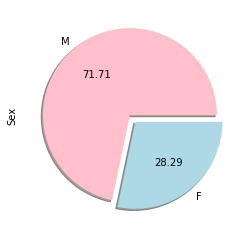

In [84]:
#we see the percentage of men and women who won the medal in Olympic
df_pie=df['Sex'].value_counts()
df_pie.plot.pie(explode=[0,0.1],autopct='%.2f', shadow =True , colors=('pink','lightblue'));

In [85]:
#compare men and women performance by the number of medals
#plt.figure(figsize=(8,6))
#sns.countplot(data=df, x='Medal', hue='Sex', palette="bwr")
#plt.title('men and women performance by the number of medals', fontsize = 14)
#plt.xlabel('Medals')
#plt.ylabel('Count')
#plt.show()

In [86]:
#men and women performance over the time
fig = px.line(total_athlete,x='Year',y=['Male','Female'])
fig.update_layout(title='Participation of men and women over the years')
fig.show()

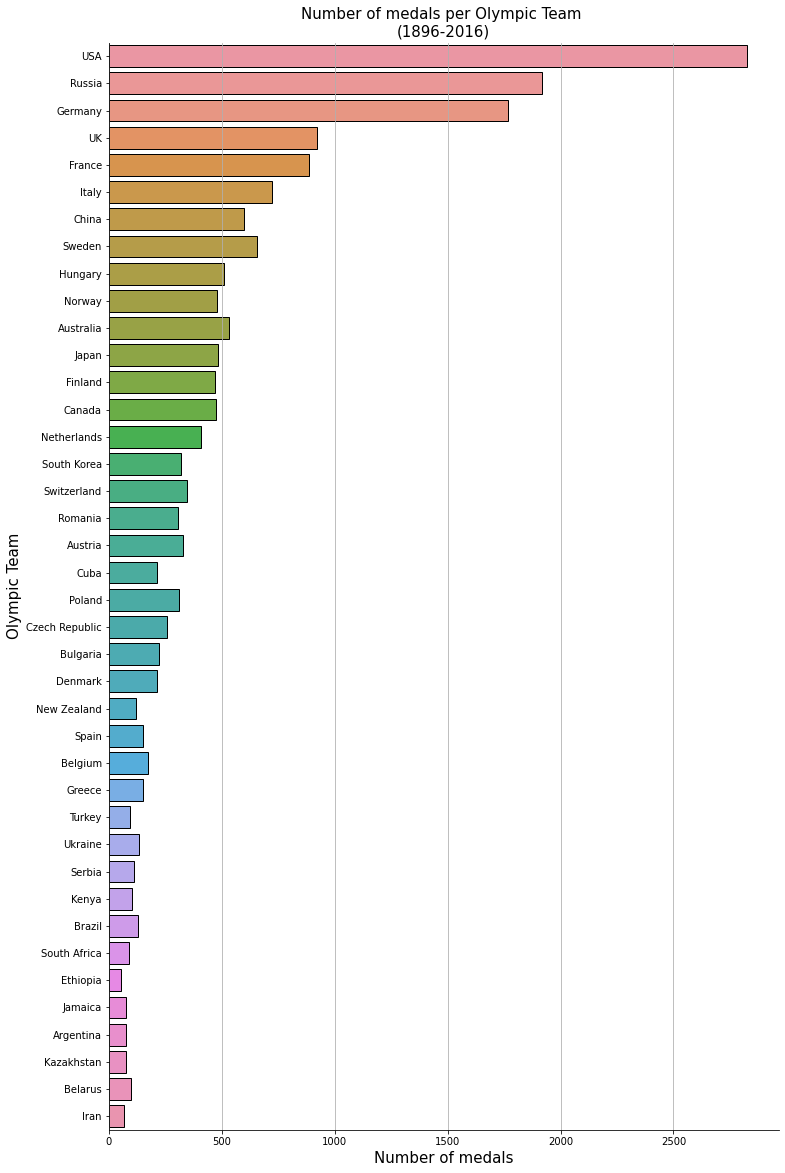

In [87]:
#by bar chart we see the 40 team that have the highest number of medals in Olympic
medals_region=number_of_different_medals.head(40)

fig, ax = plt.subplots(figsize = (12, 20))
sns.barplot(x = medals_region['Total'], 
            y = medals_region['region'],
            data = medals_region,edgecolor = 'k')
sns.despine(right=True)

plt.grid(axis='x')
plt.ylabel("Olympic Team",fontsize=15)
plt.xlabel("Number of medals",fontsize=15)
plt.title('Number of medals per Olympic Team \n(1896-2016)', size = 15)
plt.show()

In [88]:
#participation of nations in Olympic over the year


In [89]:
#Medals won in each sport in the Olympics
fig = px.bar(df_sport, x='Sport', y='Count', 
        labels={
        "Sport": "Name of the Sports",
        "Count": "Total number of medals in each sport",
        },)
fig.update_layout(title='Medals won in each sport in the Olympics',height=600)